# Análise de Dados PPVE

Notebook para realizar toda a análise dos dados necessária montando o DataFrame
do CSV.

# Monstar DataFrame

## Cabeçalho

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
pd.options.display.max_rows = 20

## Carrega DataFrame do banco CSV

In [3]:
data = pd.read_csv('DataFrame.csv', index_col='INDX')

# Dados

In [4]:
data.head()

MODE  STRESS LOAD  # VMS              ID            PPS  PKTS PPVE  \
INDX                                                                           
0     CHECKSUM       1  CPU      0  20210131065706  819549.322581   25998565   
1     CHECKSUM       1  CPU      0  20201211130924  819535.322581   25998502   
2     CHECKSUM       1  CPU      0  20201206212106  819706.677419   26000000   
3     CHECKSUM       1  CPU      0  20201209161828  819569.258065   26000000   
4     CHECKSUM       1  CPU      0  20210130083538  819735.548387   26000000   

      PKTS NIC  PKTS TOTAL  
INDX                        
0         1435    26000000  
1         1498    26000000  
2            0    26000000  
3            0    26000000  
4            0    26000000

In [5]:
data.describe()

STRESS        # VMS            ID            PPS     PKTS PPVE  \
count  4860.000000  4860.000000  4.860000e+03    4860.000000  4.860000e+03   
mean      2.000000    28.333333  2.020632e+13  818625.645066  2.521462e+07   
std       0.816581    40.308545  4.417371e+09    2178.683561  2.116173e+06   
min       1.000000     0.000000  2.020121e+13  802057.727273  1.397946e+07   
25%       1.000000     2.000000  2.020121e+13  819029.396774  2.597963e+07   
50%       2.000000     8.000000  2.021012e+13  819401.564516  2.599183e+07   
75%       3.000000    32.000000  2.021013e+13  819589.104839  2.599778e+07   
max       3.000000   128.000000  2.021020e+13  820243.521739  2.600000e+07   

            PKTS NIC    PKTS TOTAL  
count    4860.000000  4.860000e+03  
mean    24504.937654  2.523913e+07  
std     42149.015768  2.082763e+06  
min         0.000000  1.413609e+07  
25%      2219.250000  2.600000e+07  
50%      8161.500000  2.600000e+07  
75%     20286.250000  2.600000e+07  
max    434189.000000  2.600000e+07

In [7]:
data[(data['PPS'] < 812500) & (data['LOAD'] == 'NET')]

MODE  STRESS LOAD  # VMS              ID            PPS  PKTS PPVE  \
INDX                                                                           
270   CHECKSUM       1  NET      0  20201207135827  812185.968750   25994516   
271   CHECKSUM       1  NET      0  20210129042037  812247.781250   25996458   
280   CHECKSUM       1  NET      0  20210122163615  812356.093750   26000000   
281   CHECKSUM       1  NET      0  20210120194808  812358.750000   26000000   
298   CHECKSUM       1  NET      0  20201214021207  812172.000000   25994124   
...        ...     ...  ...    ...             ...            ...        ...   
3732    FILTER       2  NET     64  20201223155113  811594.875000   20063977   
3738    FILTER       2  NET     64  20210102161636  807662.166667   19387570   
3775    FILTER       2  NET    128  20201210160637  811175.218750   25977040   
4343    FILTER       3  NET      0  20201213103003  812345.500000   26000000   
4356    FILTER       3  NET      1  20210123221150  812352.406250   26000000   

      PKTS NIC  PKTS TOTAL  
INDX                        
270       5484    26000000  
271       3542    26000000  
280          0    26000000  
281          0    26000000  
298       5876    26000000  
...        ...         ...  
3732    123685    20187662  
3738    121070    19508640  
3775     22960    26000000  
4343         0    26000000  
4356         0    26000000  

[49 rows x 9 columns]

## Média dos valores

In [20]:
# O GroupBy vai agrupar de acordo com as colunas que são parametros dele, no caso ['MODE', 'STRESS', 'LOAD', '# VMS']
# Aí tu tens um agrupamento como resultado e aí tu aplica alguma função de agregação, neste caso é a mean()
# O resultado é um DataFrame multiindex, que não é tão natural para mexer, aí geralmente eu faço o que tu fez também
# que é dar um reset_index()
dataMean = data.groupby(['MODE', 'STRESS', 'LOAD', '# VMS']).mean().reset_index()
dataMean

MODE  STRESS LOAD  # VMS            ID            PPS     PKTS PPVE  \
0    CHECKSUM       1  CPU      0  2.020657e+13  819059.226582  2.532161e+07   
1    CHECKSUM       1  CPU      1  2.020627e+13  818423.619260  2.532765e+07   
2    CHECKSUM       1  CPU      2  2.020627e+13  818518.199094  2.532844e+07   
3    CHECKSUM       1  CPU      4  2.020657e+13  818526.058567  2.532257e+07   
4    CHECKSUM       1  CPU      8  2.020627e+13  818673.365032  2.510056e+07   
..        ...     ...  ...    ...           ...            ...           ...   
157    FILTER       3  NET      8  2.020627e+13  819375.352946  2.548270e+07   
158    FILTER       3  NET     16  2.020627e+13  819429.961156  2.523912e+07   
159    FILTER       3  NET     32  2.020627e+13  819096.787666  2.540511e+07   
160    FILTER       3  NET     64  2.020627e+13  819084.959134  2.518086e+07   
161    FILTER       3  NET    128  2.020627e+13  819179.751133  2.523575e+07   

         PKTS NIC    PKTS TOTAL  
0    11841.533333  2.533345e+07  
1    12078.300000  2.533973e+07  
2    12990.300000  2.534143e+07  
3    15492.933333  2.533806e+07  
4    24064.200000  2.512463e+07  
..            ...           ...  
157  17357.400000  2.550006e+07  
158  23404.500000  2.526252e+07  
159  23569.100000  2.542868e+07  
160  30634.166667  2.521149e+07  
161  30749.966667  2.526650e+07  

[162 rows x 9 columns]

## Média por STRESS

In [18]:
ppsMeanStress = dataMean.groupby(['# VMS', 'MODE', 'STRESS'])['PPS'].mean().reset_index()
ppsMeanStress

# VMS      MODE  STRESS            PPS
0       0  CHECKSUM       1  818689.855339
1       0  CHECKSUM       2  819305.822016
2       0  CHECKSUM       3  818464.884455
3       0    FILTER       1  819130.226086
4       0    FILTER       2  819063.162388
..    ...       ...     ...            ...
49    128  CHECKSUM       2  816046.543171
50    128  CHECKSUM       3  817683.499413
51    128    FILTER       1  818059.780890
52    128    FILTER       2  817182.611527
53    128    FILTER       3  818058.926488

[54 rows x 4 columns]

## Exploração

In [23]:
data.loc[data['PPS'] == data['PPS'].min()]

MODE  STRESS LOAD  # VMS              ID            PPS  PKTS PPVE  \
INDX                                                                         
4049  FILTER       2   IO    128  20201225042209  802057.727273   18887853   

      PKTS NIC  PKTS TOTAL  
INDX                        
4049    124498    19012351

In [24]:
data.loc[data['PPS'] == data['PPS'].max()]

MODE  STRESS LOAD  # VMS              ID            PPS  PKTS PPVE  \
INDX                                                                           
311   CHECKSUM       1  NET      1  20201229083736  820243.521739   19311165   

      PKTS NIC  PKTS TOTAL  
INDX                        
311      94767    19405932

In [66]:
data.groupby(['MODE'])['PPS'].mean().reset_index()

MODE            PPS
0  CHECKSUM  818560.875648
1    FILTER  818690.414484

### Porcentagem de experimentos com todos os pacotes dropados

In [26]:
totalExperimentos = data['ID'].count()
expeTodosDrops = data.loc[data['PKTS PPVE'] == data['PKTS PPVE'].max()]['ID'].count()
porcentExpeTodosDrops = (expeTodosDrops/totalExperimentos)*100

print("Total de experimentos:", totalExperimentos)
print("Experimentos com todos pacotes dropados:", expeTodosDrops)
print("Percentual de todos pacotes dropados: %.2f" % porcentExpeTodosDrops)

Total de experimentos: 4860
Experimentos com todos pacotes dropados: 592
Percentual de todos pacotes dropados: 12.18


# Investigação

<AxesSubplot:title={'center':'Média de pacotes descartados por segundo em cada tipo de Load virtual versus o número de VMs'}, xlabel='Número de VMs', ylabel='Taxa de pacotes descartados por segundo'>

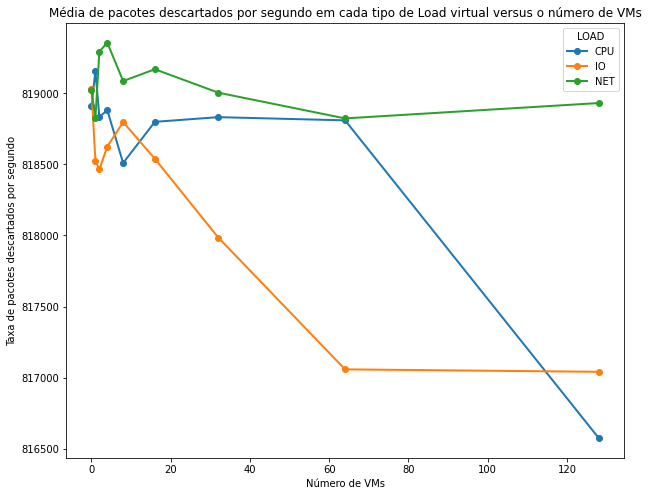

In [56]:
### Usar o plot diretamente ao invés de configurar o Matplotlib
### Primeiro tem que usar a função pivot para "girar" a tabela
### Assumindo a forma de uma planilha 2d (#VMS x LOAD), com os valores sendo o PPS
### Aí:
### INDEX -> Eixo X
### VALUES -> Eixo Y
### COLUMNS -> É o "hue", que particiona os dados em linhas distintas
ppsMeanLoad = dataMean.groupby(['# VMS', 'LOAD'])['PPS'].mean().reset_index()
df1 = ppsMeanLoad.pivot(index='# VMS', columns='LOAD', values='PPS')
df1.plot(
    title="Média de pacotes descartados por segundo em cada tipo de Load virtual versus o número de VMs",
    xlabel="Número de VMs",
    ylabel="Taxa de pacotes descartados por segundo",
    marker='o',
    linewidth=2,
)

<AxesSubplot:xlabel='# VMS', ylabel='PPS'>

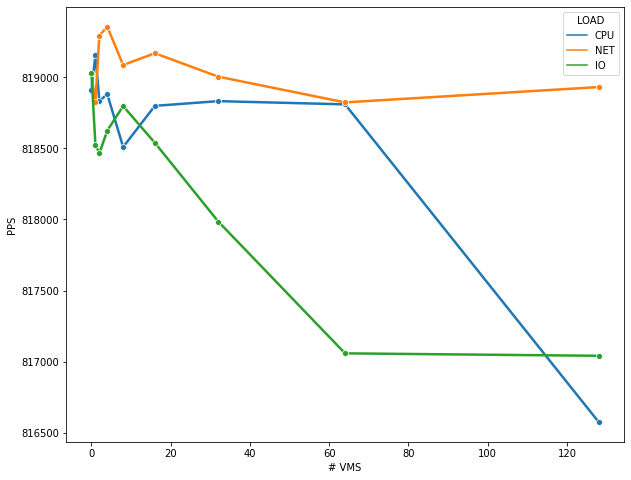

In [62]:
## Tava testando esse saborn e vi que ele suporta o hue direto no plot, ai no caso
## não precisaria dar o pivot e usava direto o data (nesse caso específico)
plt.rc('figure', figsize=(10, 8))
sns.lineplot(x='# VMS',
             y='PPS',
             hue='LOAD',
             estimator='mean',
             linewidth=2.5,
             marker='o',
             ci=None,
             data=data)

Text(0.5, 1.0, 'Variação da taxa de pacotes dropados vs. o tipo de Stress do XDP')

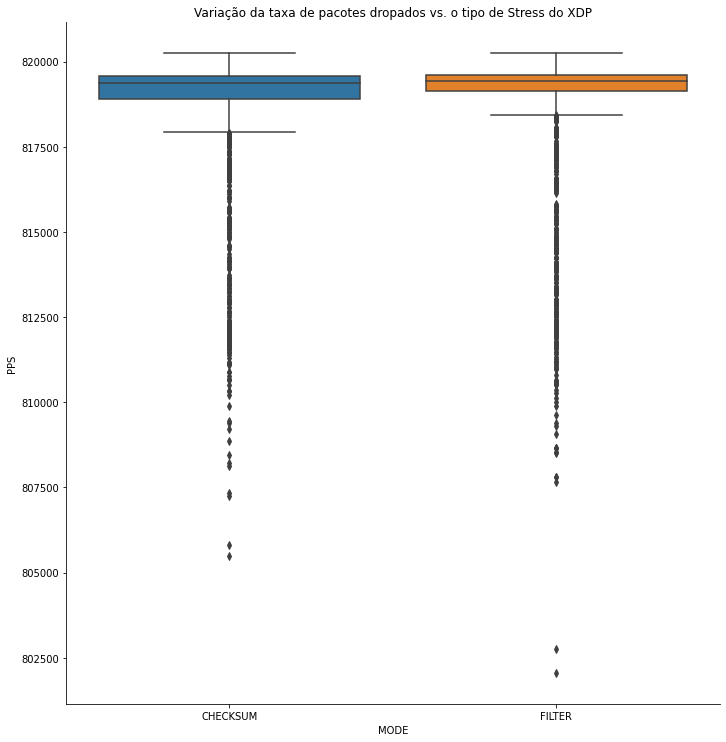

In [35]:
sns.catplot(x='MODE', y='PPS', orient='v', kind='box', height=10,
            data=data)
plt.title('Variação da taxa de pacotes dropados vs. o tipo de Stress do XDP')

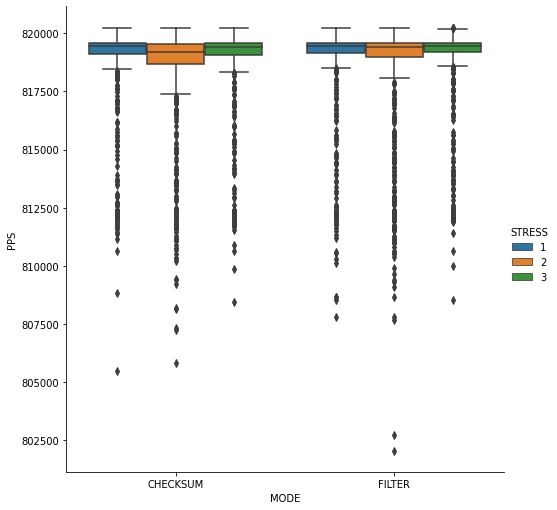

In [37]:
sns.catplot(x='MODE', y='PPS', orient='v', kind='box', height=7, hue='STRESS',
           data=data)

Text(0.5, 1.0, 'Variação da taxa de pacotes dropados versus o tipo de Load das VMs')

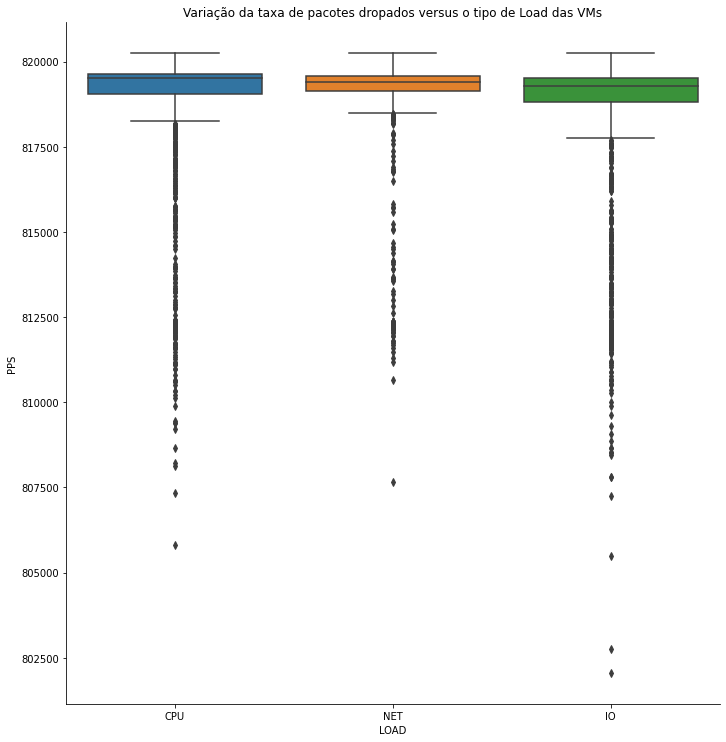

In [38]:
sns.catplot(x='LOAD', y='PPS', orient='v', kind='box', height=10,
            data=data)
plt.title('Variação da taxa de pacotes dropados versus o tipo de Load das VMs')

(24500000.0, 26000000.0)

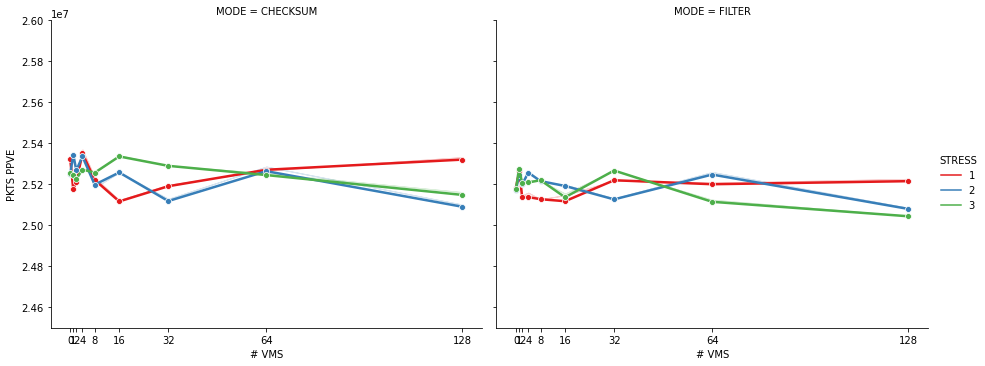

In [110]:
plt.rc('figure', figsize=(20, 10))
sns.relplot(x='# VMS',
            y='PKTS PPVE',
            hue='STRESS',
            col='MODE',
            estimator='mean',
            linewidth=2.5,
            marker="o",
            palette='Set1',
            kind="line",
            height=5,
            aspect=1.3,
            ci=0.0,
            data=data)
plt.xticks(ticks=[0, 1, 2, 4, 8, 16, 32, 64, 128])
plt.ylim(24500000, 26000000)


(24000000.0, 26000000.0)

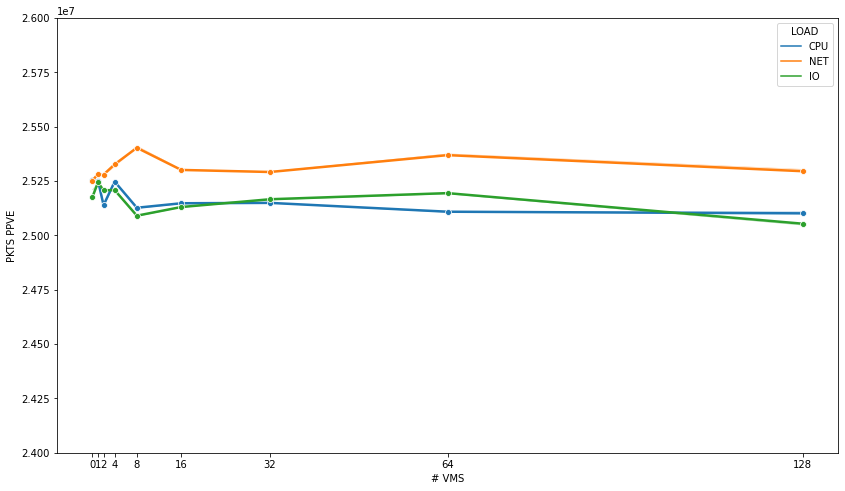

In [71]:
plt.rc('figure', figsize=(14, 8))
sns.lineplot(x='# VMS',
             y='PKTS PPVE',
             hue='LOAD',
             estimator='mean',
             linewidth=2.5,
             marker="o",
             ci=0,
             data=data)
plt.xticks(ticks=[0, 1, 2, 4, 8, 16, 32, 64, 128])
plt.ylim(24000000, 26000000)

Text(0.5, 1.0, 'Variação da taxa de pacotes descartados por segundo vs. número de VMs')

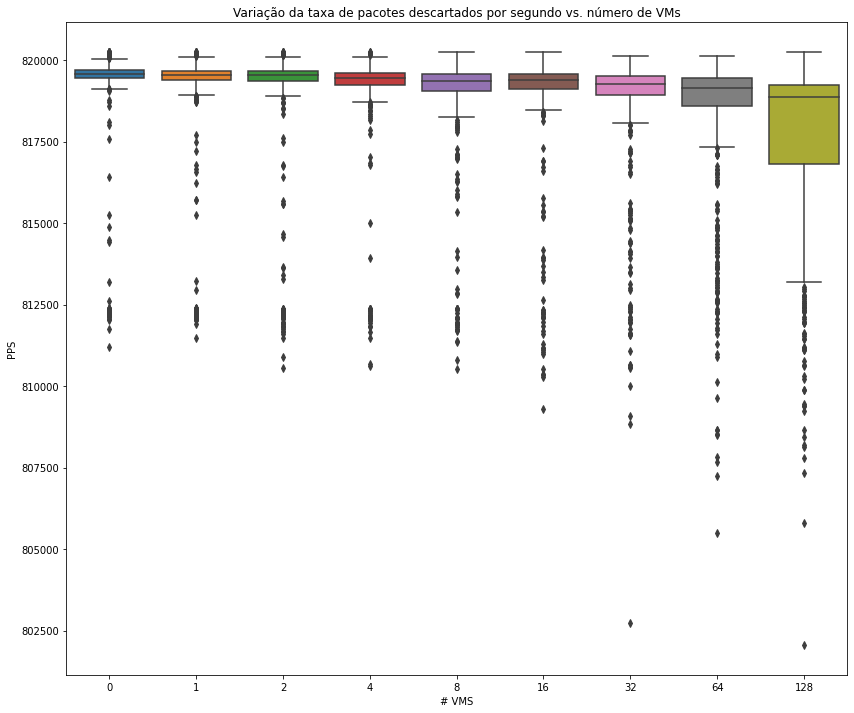

In [97]:
plt.rc('figure', figsize=(14, 12))
sns.boxplot(x='# VMS', y='PPS', orient='v', data=data)
plt.title('Variação da taxa de pacotes descartados por segundo vs. número de VMs')

<AxesSubplot:xlabel='PKTS PPVE', ylabel='PPS'>

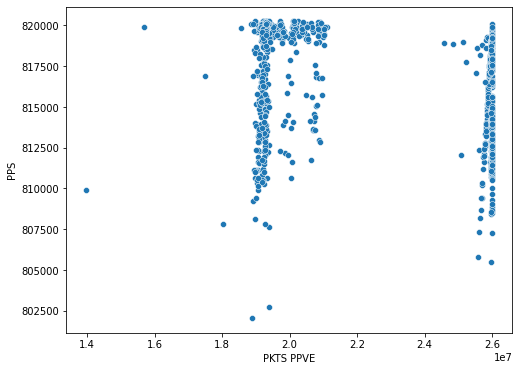

In [115]:
plt.rc('figure', figsize=(8, 6))
sns.scatterplot(y='PPS',
                x='PKTS PPVE',
                data=data)

Text(0, 0.5, 'Total de pacotes descartados')

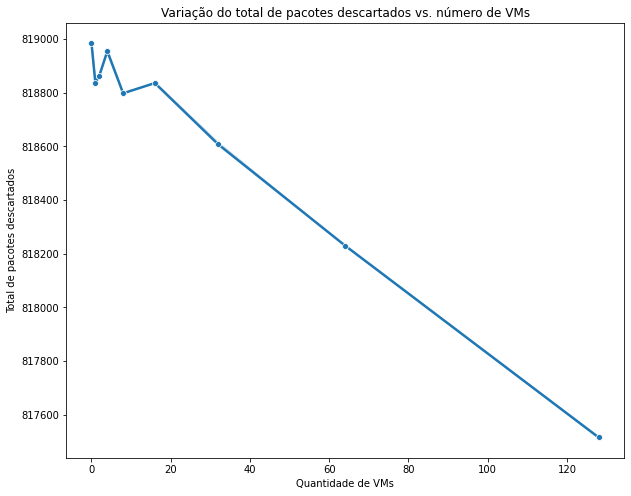

In [137]:
plt.rc('figure', figsize=(10, 8))
sns.lineplot(x='# VMS',
             y='PPS',
             estimator=np.mean,
             linewidth=2.5,
             marker="o",
             ci=0,
             data=data)
plt.title('Variação do total de pacotes descartados vs. número de VMs')
plt.xlabel("Quantidade de VMs")
plt.ylabel("Total de pacotes descartados")

# Plots

## Taxa de descarte/segundo vs. VMs

Text(0, 0.5, 'Pacotes por segundo')

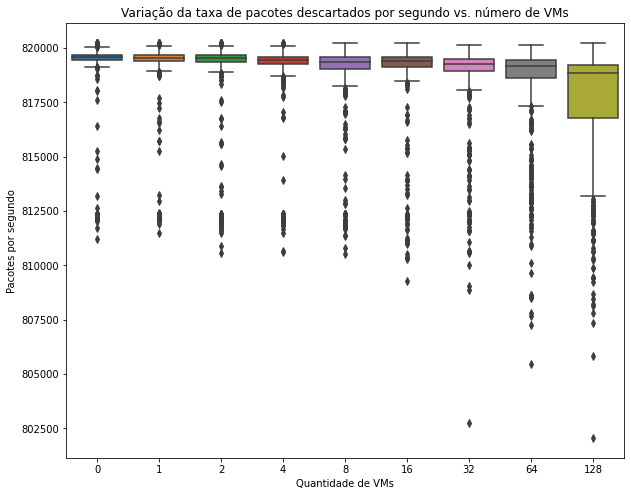

In [55]:
plt.rc('figure', figsize=(10, 8))
sns.boxplot(x='# VMS',
            y='PPS',
            orient='v',
            data=data)
plt.title('Variação da taxa de pacotes descartados por segundo vs. número de VMs')
plt.xlabel("Quantidade de VMs")
plt.ylabel("Pacotes por segundo")

## Total de pacotes descartados vs. VMs

Text(0, 0.5, 'Total de pacotes descartados')

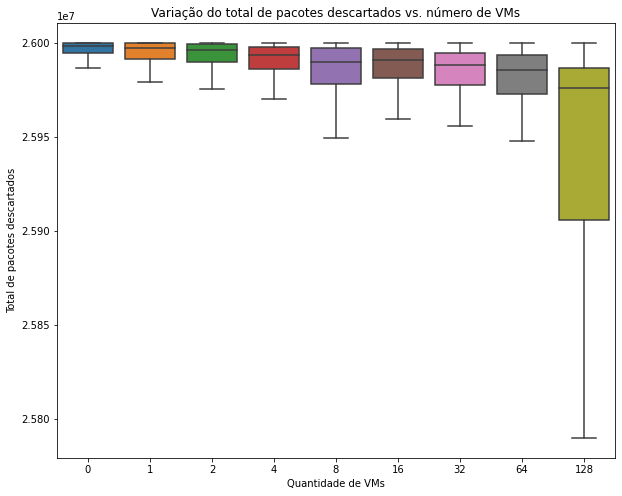

In [54]:
plt.rc('figure', figsize=(10, 8))
sns.boxplot(x='# VMS',
            y='PKTS PPVE',
            orient='v',
            showfliers=False,
            data=data)
plt.title('Variação do total de pacotes descartados vs. número de VMs')
plt.xlabel("Quantidade de VMs")
plt.ylabel("Total de pacotes descartados")

## Taxa de descarte/segundo separado entre os modos do PPVE vs. VMs

Text(0, 0.5, 'Pacotes por segundo')

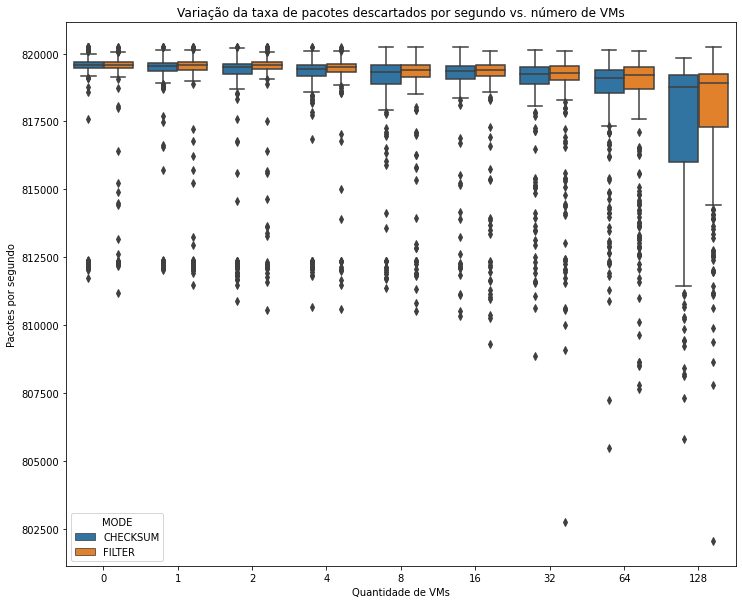

In [51]:
plt.rc('figure', figsize=(12, 10))
sns.boxplot(x='# VMS',
            y='PPS',
            orient='v',
            hue='MODE',
            data=data)
plt.title('Variação da taxa de pacotes descartados por segundo vs. número de VMs')
plt.xlabel("Quantidade de VMs")
plt.ylabel("Pacotes por segundo")

## Taxa de descarte/segundo separado entre o Load virtual vs. VMs

Text(0, 0.5, 'Pacotes por segundo')

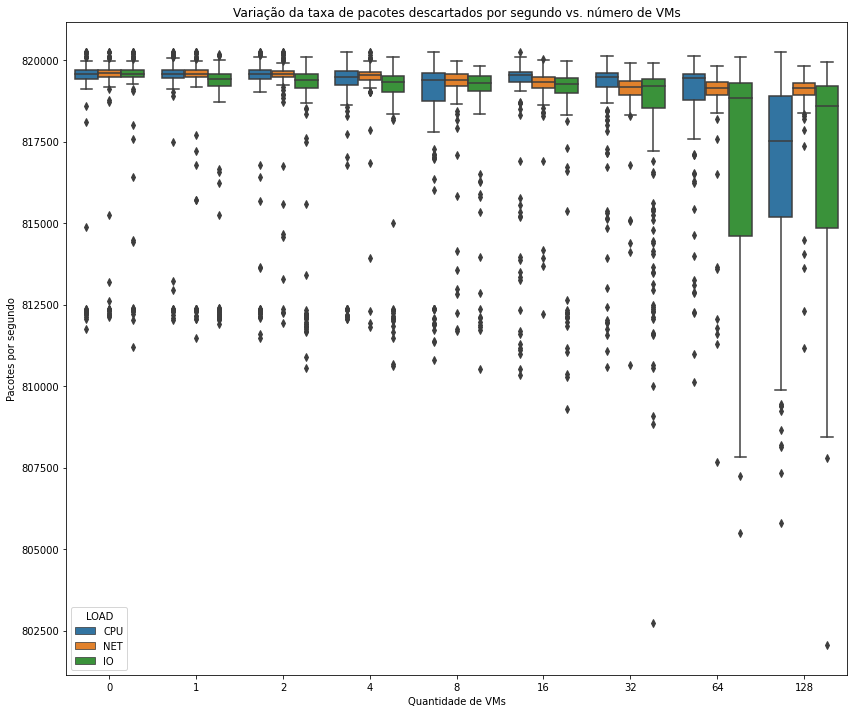

In [50]:
plt.rc('figure', figsize=(14, 12))
sns.boxplot(x='# VMS',
            y='PPS',
            hue='LOAD',
            orient='v',
            data=data)
plt.title("Variação da taxa de pacotes descartados por segundo vs. número de VMs")
plt.xlabel("Quantidade de VMs")
plt.ylabel("Pacotes por segundo")

## Mediana de descarte/segundo separado entre os modos PPVE vs. VMs

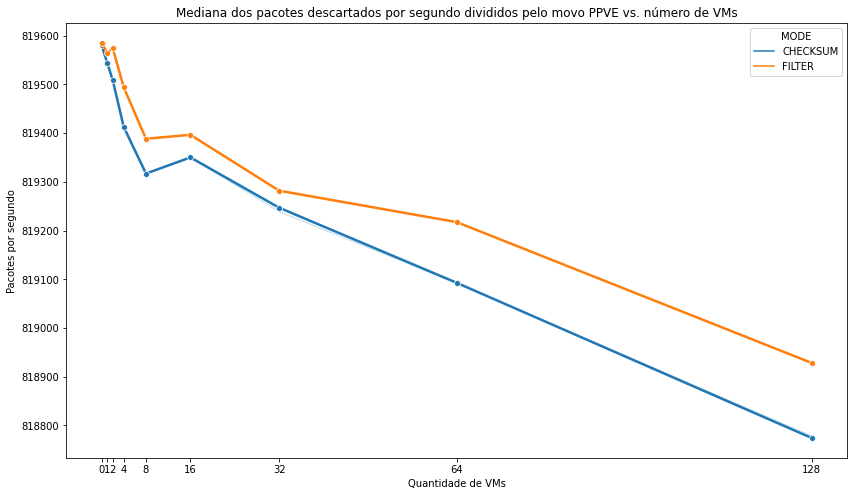

In [145]:
plt.rc('figure', figsize=(14, 8))
sns.lineplot(x='# VMS',
             y='PPS',
             hue='MODE',
             estimator=np.median,
             linewidth=2.5,
             marker="o",
             ci=0,
             data=data)
plt.xticks(ticks=[0, 1, 2, 4, 8, 16, 32, 64, 128])
plt.title("Mediana dos pacotes descartados por segundo divididos pelo movo PPVE vs. número de VMs")
plt.xlabel("Quantidade de VMs")
plt.ylabel("Pacotes por segundo")
plt.savefig('mediana-PPSvsVMS.pdf', dpi=400)

# Notas

In [ ]:
data[data['PKTS TOTAL'] != 26000000 ]

In [ ]:
data[(data['MODE'] == 'CHECKSUM') & 
     (data['LOAD'] == 'CPU') & 
     (data['STRESS'] == 1) & 
     (data['# VMS'] == 0) ]['PPS'].describe()

In [ ]:
teste = list(data['ID'].sort_values())
#plt.ylim(20201205000000, 20201231235959)
plt.plot(teste)

In [ ]:
'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'